# Getting started

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import numpy as np

In [3]:
from IPython.display import Image
width=800; height=500
dir_path = r'D:\ASSIST\img'

In [4]:
from sklearn import datasets
X, y = datasets.load_wine(return_X_y=True, as_frame=True)
df = X.merge(y, left_index=True, right_index=True)
df.head()
df.shape

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


(178, 14)

In [5]:
df.target.value_counts(normalize=True)

1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

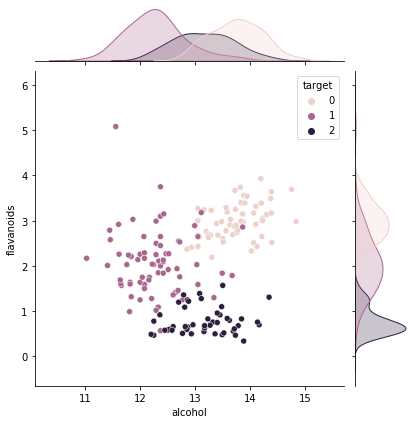

In [6]:
sns.jointplot(data=df, x='alcohol',y='flavanoids', hue='target')

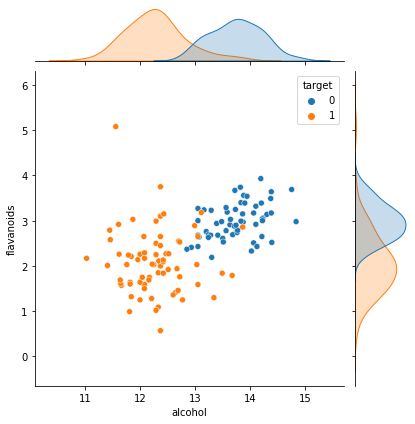

In [7]:
sns.jointplot(data=df.loc[df.target < 2, :], x='alcohol',y='flavanoids', hue='target')

In [8]:
data = df.loc[df.target < 2, :]
data_mean = data.groupby('target')[['alcohol','flavanoids']].mean().round(2).reset_index()
data_mean
X = data_mean.drop(['target'], axis=1)
y = data_mean['target']

,target,alcohol,flavanoids
0,0,13.74,2.98
1,1,12.28,2.08


In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X,y)
clf.predict([[14, 1]])

RandomForestClassifier(random_state=0)

array([0], dtype=int64)

In [10]:
X = data[['alcohol','flavanoids']]
y = data['target']
y_pred = clf.predict(X)
(y_pred == y).mean()
from sklearn.metrics import accuracy_score # 사이킷런의 정확도 산출 모듈
accuracy_score(y_pred, y)

0.9230769230769231

0.9230769230769231

In [11]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X,y)
y_pred = clf.fit(X,y).predict(X)
accuracy_score(y_pred, y)

RandomForestClassifier(random_state=0)

1.0

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions # 2차원 특성변수의 분류경계선을 시각
clfs = [RandomForestClassifier(), LogisticRegression(), SVC(), GaussianNB(), KNeighborsClassifier()]

In [13]:
for i, clf in enumerate(clfs) :
    y_pred = clf.fit(X,y).predict(X)
    print(f'{clf}알고리즘의 예측 모형정확도 {accuracy_score(y_pred, y).round(2)}') # 정확도(Accuracy)

RandomForestClassifier()알고리즘의 예측 모형정확도 1.0
LogisticRegression()알고리즘의 예측 모형정확도 0.93
SVC()알고리즘의 예측 모형정확도 0.93
GaussianNB()알고리즘의 예측 모형정확도 0.94
KNeighborsClassifier()알고리즘의 예측 모형정확도 0.96


RandomForestClassifier()알고리즘의 예측 모형정확도 1.0


<AxesSubplot:>

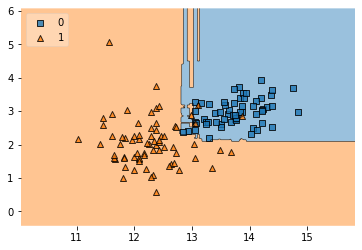

LogisticRegression()알고리즘의 예측 모형정확도 0.93


<AxesSubplot:>

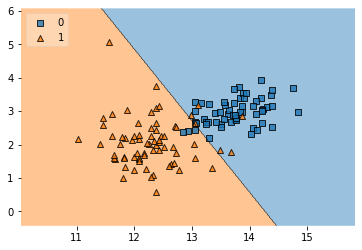

SVC()알고리즘의 예측 모형정확도 0.93


<AxesSubplot:>

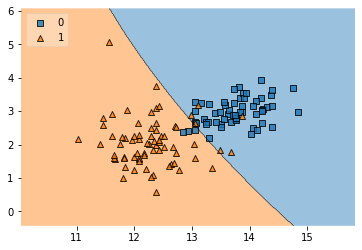

GaussianNB()알고리즘의 예측 모형정확도 0.94


<AxesSubplot:>

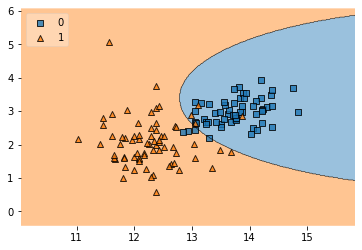

KNeighborsClassifier()알고리즘의 예측 모형정확도 0.96


<AxesSubplot:>

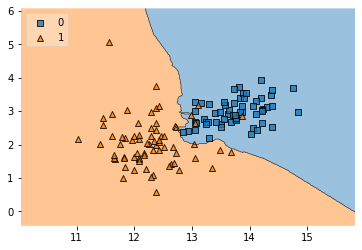

In [14]:
for i, clf in enumerate(clfs) :
    y_pred = clf.fit(X,y).predict(X)
    print(f'{clf}알고리즘의 예측 모형정확도 {accuracy_score(y_pred, y).round(2)}') # 정확도(Accuracy)
    plot_decision_regions(X.values, y.values, clf=clf, legend=2); plt.show()

## 새로운 데이터를 불러와서 예시로 보여준다

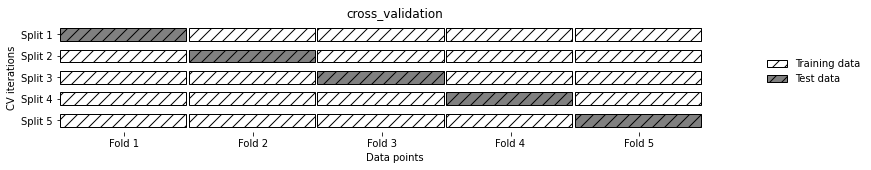

In [15]:
import mglearn
mglearn.plots.plot_cross_validation()

In [16]:
X_train = X[1::2]; y_train = y[1::2]
X_test = X[::2]; y_test = y[::2]
clf = LogisticRegression()
y_pred = clf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_pred, y_test)

0.9538461538461539

In [17]:
from sklearn.model_selection import train_test_split # 훈련과 검증데이터 분류
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_pred, y_test)

0.9615384615384616

In [18]:
from sklearn.preprocessing import StandardScaler
X_train_std = StandardScaler().fit(X_train).transform(X_train)
X_test_std = StandardScaler().fit(X_test).transform(X_test)
y_pred= clf.fit(X_train_std, y_train).predict(X_test_std) 
accuracy_score(y_pred, y_test)

0.9230769230769231

In [19]:
from sklearn.pipeline import make_pipeline
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)
y_pred = pipe.fit(X_train, y_train).predict(X_test)
accuracy_score(y_pred, y_test)

0.9615384615384616

In [20]:
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()), ('SVM', SVC())]
pipeline = Pipeline(steps) # define the pipeline object.
y_pred = pipeline.fit(X_train, y_train).predict(X_test)
accuracy_score(y_pred, y_test)

0.9615384615384616

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(5),
    RandomForestClassifier()]

In [22]:
for clf in classifiers:
    clf
    pipe = make_pipeline(
    StandardScaler(),
    clf)
    y_pred = pipe.fit(X_train, y_train).predict(X_test)
    accuracy_score(y_pred, y_test)
    print('*'*100)

LogisticRegression()

0.9615384615384616

****************************************************************************************************


KNeighborsClassifier()

0.9615384615384616

****************************************************************************************************


RandomForestClassifier()

0.9615384615384616

****************************************************************************************************


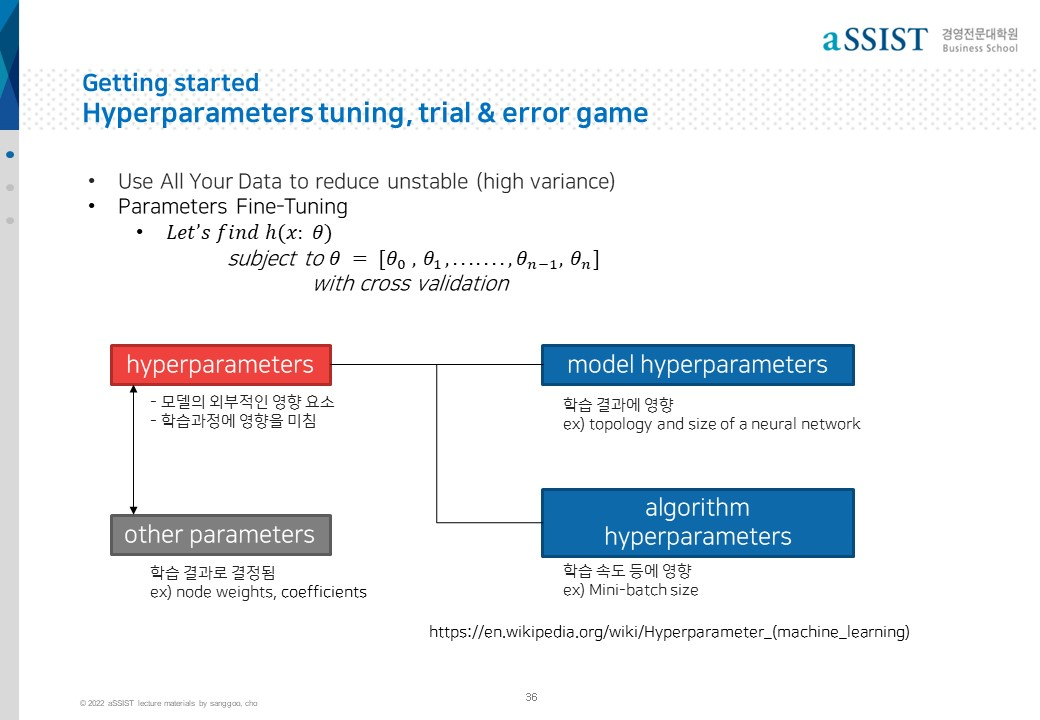

In [23]:
Image(filename=dir_path + '/슬라이드36.jpg', width=width, height=height)

<BarContainer object of 5 artists>

Text(0.5, 1.0, '5번 교차검증(KFlod)의 모형 정확도')

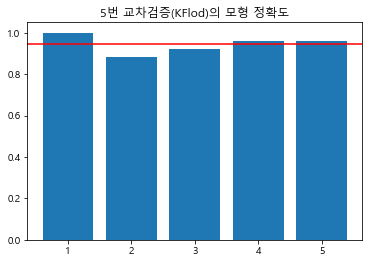

In [24]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=11)
accuracy_list = []
for train_index, test_index in kf.split(X):
    X_train, y_train = X.iloc[train_index, :], y[train_index]
    X_test, y_test = X.iloc[test_index], y[test_index]
    y_predict = pipe.fit(X_train, y_train).predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_predict))
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 표시
plt.rcParams['axes.unicode_minus'] = False  #한글 폰트 사용시 마이너스 폰트 깨짐 해결
plt.bar(np.arange(1, 6), accuracy_list)
plt.axhline(y=np.array(accuracy_list).mean(), color='r', linestyle='-')
plt.title('5번 교차검증(KFlod)의 모형 정확도')

In [25]:
from sklearn.model_selection import cross_validate
np.mean(accuracy_list)
result = cross_validate(pipe, X, y, cv=kf)  # defaults to 5-fold CV
result['test_score'].mean()

0.9461538461538461

0.9384615384615385

In [26]:
pipe
clf
clf.get_params()

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

RandomForestClassifier()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [27]:
pipe = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

### 총 250번(50*50)의 gridsearch를 하는 대신 교차검증 20회만 무작위로 실시(총 5*20 = 100 fits)

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distributions = {'randomforestclassifier__max_depth': np.random.choice(100, 50),
                       'randomforestclassifier__n_estimators' : np.random.choice(100, 50)
                      }
rs = RandomizedSearchCV(estimator=pipe,
                        n_iter=20,
                        param_distributions=param_distributions,
                        random_state=0, verbose=1)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=20,
                   param_distributions={'randomforestclassifier__max_depth': array([53, 89, 97, 41,  8, 41, 88, 34, 48, 39, 96, 87, 79, 92,  6, 18, 25,
        0, 62, 28,  5, 59, 44, 69, 19, 22, 43, 38, 56,  2, 27, 69, 19, 73,
        1, 17, 84, 50, 55, 89, 37, 20, 42, 14, 50, 62, 55,  8, 24, 49]),
                                        'randomforestclassifier__n_estimators': array([16, 63, 60,  0, 31, 36, 13, 12, 49, 81,  8, 14, 95, 89,  8, 65,  2,
       72, 62, 82,  6, 35, 35, 67, 57, 21,  9, 84, 39, 13, 49, 57,  9, 56,
       89, 13, 48, 69, 16, 17, 47, 73, 28, 38, 72, 97, 50, 41, 47, 14])},
                   random_state=0, verbose=1)

In [29]:
print('optimal train score: {:.3f}'.format(rs.best_score_))
print('test score: {:.3f}'.format(rs.score(X_test, y_test)))
print('optimal parameter: {}'.format(rs.best_params_))

optimal train score: 0.942
test score: 0.962
optimal parameter: {'randomforestclassifier__n_estimators': 36, 'randomforestclassifier__max_depth': 6}


In [30]:
results= pd.DataFrame(rs.cv_results_)[['params','mean_test_score', 'rank_test_score']]
results.sort_values('rank_test_score').round(4).head(10)

,params,mean_test_score,rank_test_score
9,"{'randomforestclassifier__n_estimators': 36, 'randomforestclassifier__max_depth': 6}",0.9424,1
16,"{'randomforestclassifier__n_estimators': 89, 'randomforestclassifier__max_depth': 14}",0.9329,2
15,"{'randomforestclassifier__n_estimators': 47, 'randomforestclassifier__max_depth': 55}",0.9329,2
13,"{'randomforestclassifier__n_estimators': 69, 'randomforestclassifier__max_depth': 96}",0.9329,2
12,"{'randomforestclassifier__n_estimators': 63, 'randomforestclassifier__max_depth': 1}",0.9329,2
11,"{'randomforestclassifier__n_estimators': 35, 'randomforestclassifier__max_depth': 50}",0.9329,2
10,"{'randomforestclassifier__n_estimators': 13, 'randomforestclassifier__max_depth': 42}",0.9329,2
18,"{'randomforestclassifier__n_estimators': 36, 'randomforestclassifier__max_depth': 18}",0.9329,2
19,"{'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__max_depth': 37}",0.9329,2
7,"{'randomforestclassifier__n_estimators': 39, 'randomforestclassifier__max_depth': 84}",0.9329,2


In [31]:
results

,params,mean_test_score,rank_test_score
0,"{'randomforestclassifier__n_estimators': 0, 'randomforestclassifier__max_depth': 73}",NaN,20
1,"{'randomforestclassifier__n_estimators': 13, 'randomforestclassifier__max_depth': 25}",0.923333,13
2,"{'randomforestclassifier__n_estimators': 89, 'randomforestclassifier__max_depth': 18}",0.923333,15
3,"{'randomforestclassifier__n_estimators': 57, 'randomforestclassifier__max_depth': 1}",0.882857,19
4,"{'randomforestclassifier__n_estimators': 56, 'randomforestclassifier__max_depth': 5}",0.932857,2
5,"{'randomforestclassifier__n_estimators': 84, 'randomforestclassifier__max_depth': 41}",0.923333,15
6,"{'randomforestclassifier__n_estimators': 39, 'randomforestclassifier__max_depth': 17}",0.932857,2
7,"{'randomforestclassifier__n_estimators': 39, 'randomforestclassifier__max_depth': 84}",0.932857,2
8,"{'randomforestclassifier__n_estimators': 95, 'randomforestclassifier__max_depth': 8}",0.923333,15
9,"{'randomforestclassifier__n_estimators': 36, 'randomforestclassifier__max_depth': 6}",0.942381,1


In [32]:
from joblib import dump, load
dump(rs.best_estimator_, '../working/randoforest_randomized.joblib')

['../working/randoforest_randomized.joblib']

# Peril of overfitting

### Figure 1. Sick (blue) and healthy (orange) trees.
<img src='https://developers.google.com/machine-learning/crash-course/images/GeneralizationA.png' width=300 height=300>

### Figure 2. A complex model for distinguishing sick from healthy trees.
- At first glance, the model shown in Figure 2 appeared to do an excellent job of separating the healthy trees from the sick ones. Or did it?
<img src='https://developers.google.com/machine-learning/crash-course/images/GeneralizationB.png' width=300 height=300>

### Figure 3. The model did a bad job predicting new data.
- The model shown in Figures 2 and 3 overfits the peculiarities of the data it trained on. An overfit model gets a low loss during training but does a poor job predicting new data. If a model fits the current sample well, how can we trust that it will make good predictions on new data? 
<img src='https://developers.google.com/machine-learning/crash-course/images/GeneralizationC.png' width=300 height=300>

William of Ockham, a 14th century friar and philosopher, loved simplicity. He believed that scientists should prefer simpler formulas or theories over more complex ones. To put Ockham's razor in machine learning terms:
The less complex an ML model, the more likely that a good empirical result is not just due to the peculiarities of the sample.

In modern times, we've formalized Ockham's razor into the fields of statistical learning theory and computational learning theory. These fields have developed generalization bounds--a statistical description of a model's ability to generalize to new data based on factors such as:

- 1. the complexity of the model
- 2. the model's performance on training data

### Slicing a single data set into a training set and test set.
<img src = 'https://developers.google.com/machine-learning/crash-course/images/TrainingDataVsTestData.svg'>

# End